# PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

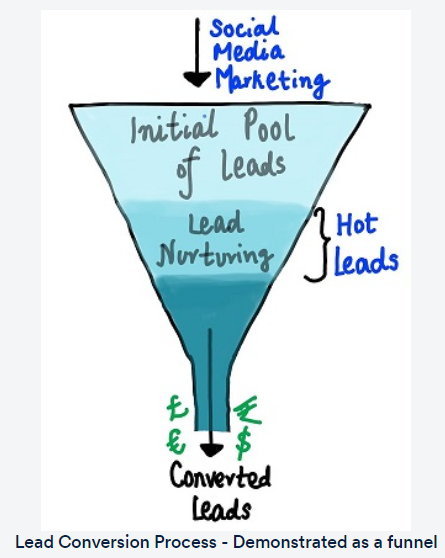


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

**Data**

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 
 

**Goals of the Case Study**

There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# 1. Reading and Understanding the data

In [1]:
# Load necessary primary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load utilities from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

# Load utilities from statsmodel
import statsmodels.api as sm
from statsmodels.api import add_constant, GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting the random seed to repeatability
np.random.seed(100)

Read the data

In [3]:
data=pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Explore the data

In [4]:
# Shape of the data
data.shape

(9240, 37)

In [5]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. Data Preparation and Cleaning

## Handling missing values

Let's check the missing values in the data.

In [6]:
(data.isnull().sum()/len(data)*100).round(2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

As per the general thumb rule, remove all the columns with more than 40% missing values.

In [7]:
ind=data.isnull().sum()[data.isnull().sum()/len(data)>0.4].index
data.drop(ind,axis=1,inplace=True)
data.shape

(9240, 32)

Now, it's given that certain categorical variables have category 'Select', which is equivalent to a missing value. So let's convert it to a missing value and check further.

In [8]:
(data.isnull().sum()/len(data)*100).round(2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

In [9]:
cat_cols=data.select_dtypes(include=['object']).columns

In [10]:
for col in cat_cols:
    data[col]=data[col].apply(lambda x:np.NaN if x=='Select' else x)

In [11]:
(data.isnull().sum()/len(data)*100).round(2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

There are now two more columns with high values of missing values. So these columns need to be removed.

In [12]:
data.drop(['How did you hear about X Education','Lead Profile'],axis=1,inplace=True)
data.shape

(9240, 30)

In [13]:
(data.isnull().sum()/len(data)*100).round(2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

Now let's check each columns one by one to handle the missing values. We will start with the variable `City`.

In [14]:
print(data.City.value_counts())

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


Since this variable has high skewness towards one particular category and has high amount of missing values, we will drop this column. 

In [15]:
data.drop('City',axis=1,inplace=True)

Nex we go about with variables `Specialization` and `Tags`.

In [16]:
data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
data.Specialization.isnull().sum()

3380

Since the null values are more than thrice of the modal value, it is better to drop this column.

In [18]:
data.drop('Specialization',axis=1,inplace=True)

In [19]:
data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
data.Tags.isnull().sum()

3353

Here also, number of null values is a lot higher than the modal value. So we should remove this columns also.

In [21]:
data.drop('Tags',axis=1,inplace=True)

Now, let's handle the rest of the columns with the missing values.


In [22]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This variable has almost all either a null value or a unique value. Hence, this column is of no significance in model building, as it has almost no variability. So we will drop this columns.

In [23]:
data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [24]:
data.isnull().sum().sort_values(ascending=False)

What is your current occupation             2690
Country                                     2461
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
X Education Forums                             0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
Search                                         0
Newspaper Article                              0
Magazine                                       0
Lead Number                                    0
Total Time Spent on 

In [25]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
data['What is your current occupation'].isnull().sum()

2690

Since, this could be the case due to customer not specifying their occupation, we could create a new category 'Unspecified' for the missing values.

In [27]:
data['What is your current occupation']=data['What is your current occupation'].fillna('Unspecified')

In [28]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Unspecified             2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
data.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

This variable has almost all either a null value or a unique value. Hence, this column is of no significance in model building, as it has almost no variability. So we will drop this columns.

In [30]:
data.drop('Country',axis=1,inplace=True)

In [31]:
data.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Search                                        0
Newspaper Article                             0
Magazine                                      0
Lead Number                                   0
What is your current occupation               0
Total Time Spent on Website                   0
Converted                               

Now, Let's handle the remaining columns with the missing values.

Handing `TotalVisits` column

Here, we will impute the missing values with the median value.

In [32]:
data.TotalVisits=data.TotalVisits.fillna(data.TotalVisits.median())

Handling `Page Views Per Visit` column

We will impute the missing values with the median value.

In [33]:
data['Page Views Per Visit']=data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())

Handling `Last Activity` column

In [34]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Here, the missing values could be due to the unknown reasons. Hence, we will fill the missing values with the category 'Unknown'.

In [35]:
data['Last Activity']=data['Last Activity'].fillna('Unknown')

Finally, the handling the column `Lead Source`

Here, we have decided to remove the rows, as the number of missing values are very less in comparison to the total samples.

In [36]:
data=data[~data['Lead Source'].isnull()]

Let's look at the final info of the data.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9204 non-null   object 
 1   Lead Number                               9204 non-null   int64  
 2   Lead Origin                               9204 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9204 non-null   object 
 5   Do Not Call                               9204 non-null   object 
 6   Converted                                 9204 non-null   int64  
 7   TotalVisits                               9204 non-null   float64
 8   Total Time Spent on Website               9204 non-null   int64  
 9   Page Views Per Visit                      9204 non-null   float64
 10  Last Activity                       

In [38]:
data.shape

(9204, 25)

Now, the data has been dealt for the missing values.

## Handling outliers

Let's see the descriptive statistics of the datset.

In [39]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.449587,489.005541,2.364923
std,23418.830233,0.486324,4.824662,547.980340,2.145999
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


Let's plot the box plots for these to see the presence of outliers.

In [40]:
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

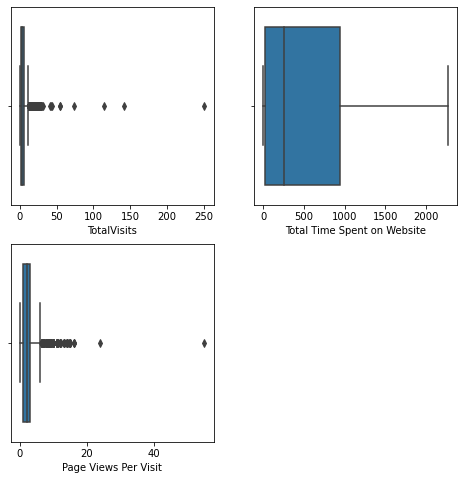

In [41]:
i=1
plt.figure(figsize=(8,8))
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(data[col])
    i+=1
plt.show()

We can see that, columns `TotalVisits` and `Page Views Per Visit` have some outliers at the higher side. Let's deal with them.

We will select the threshold as 30 and 20 respectively for the columns `TotalVisits` and `Page Views Per Visit` for removing the outlier data points, as most of the values  seems to be relevant.

In [42]:
data=data[data['TotalVisits']<30]

In [43]:
data.shape

(9193, 25)

In [44]:
data=data[data['Page Views Per Visit']<20]

In [45]:
data.shape

(9192, 25)

Now let's check the boxplots once again.

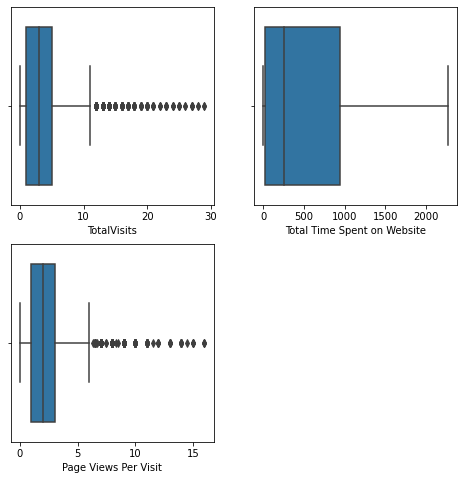

In [46]:
i=1
plt.figure(figsize=(8,8))
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(data[col])
    i+=1
plt.show()

All the outliers have been handled here.

# 3. Exploratory Data Analysis

## Numerical variables

Let's check out the distribution of the target variable.

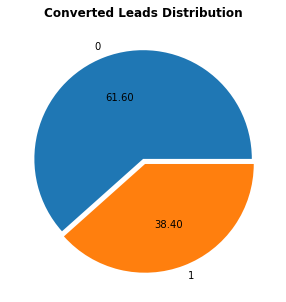

In [47]:
plt.figure(figsize=[10,5])
plt.pie(data.Converted.value_counts(normalize=True)*100,labels=data.Converted.value_counts().index,explode=(0,0.05),autopct='%.2f')
plt.title('Converted Leads Distribution',weight='bold')
plt.show()

As we can see that, there is a data imbalance in the target variable. 

Now, let's observe other numerical variables with respect to the target variable.

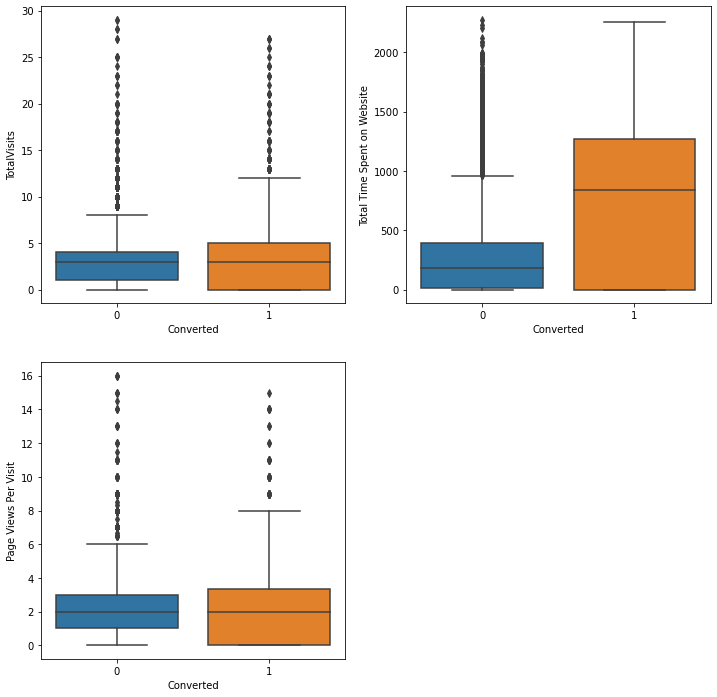

In [48]:
i=1
plt.figure(figsize=(12,12))
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(data=data,x='Converted',y=col)
    i+=1
plt.show()

**Insights:**
- TotalVisits seems to have a positive relationship with Leads getting Converted.
- Total timme spent on a website has a highly positive relationship with the Leads getting converted.
- Page Views per visit also seems to have some positive relationship with the Leads getting converted.

## Categorical Variables

Now let's analyze the categorical variables with respect to the target variables.

In [49]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
cat_cols=['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

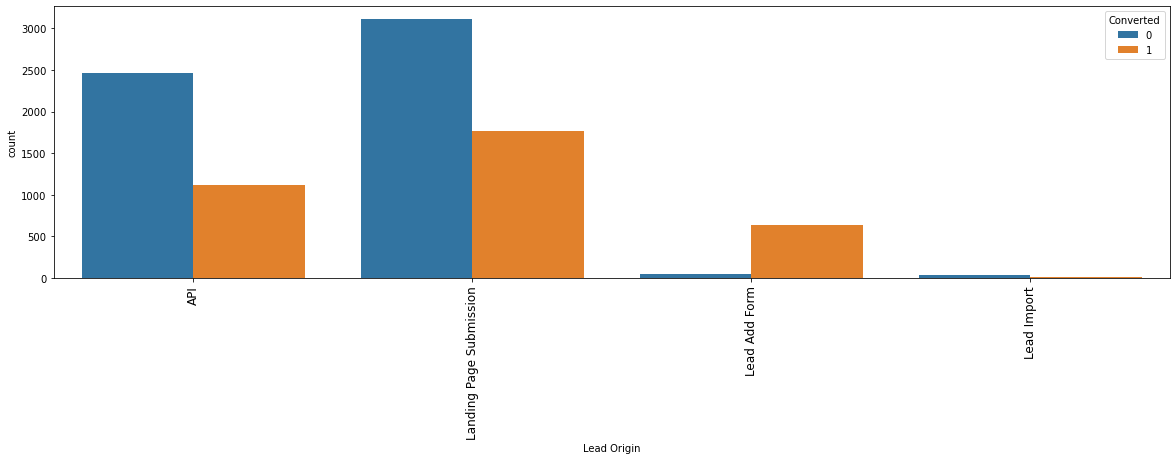

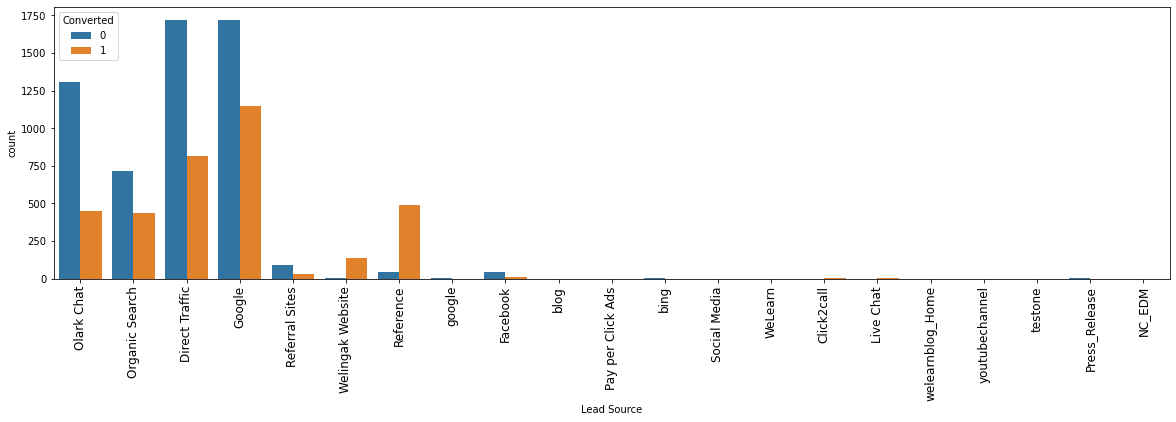

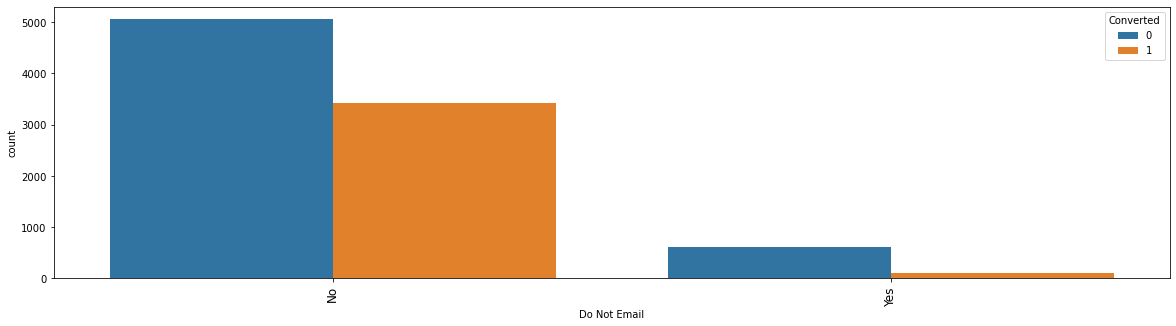

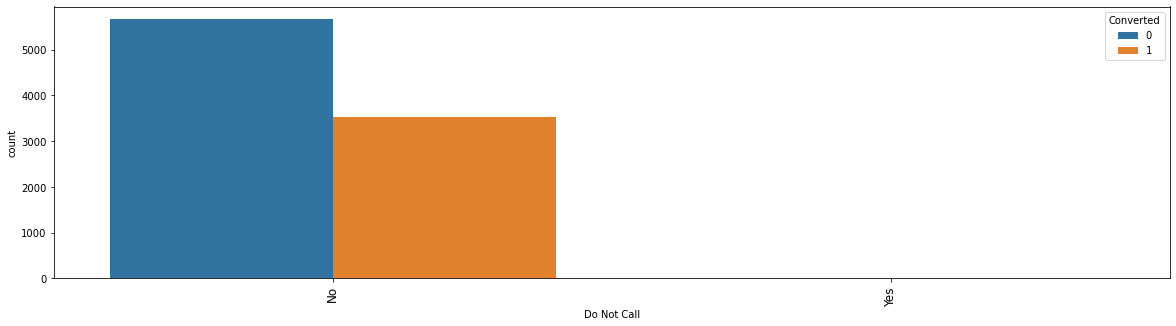

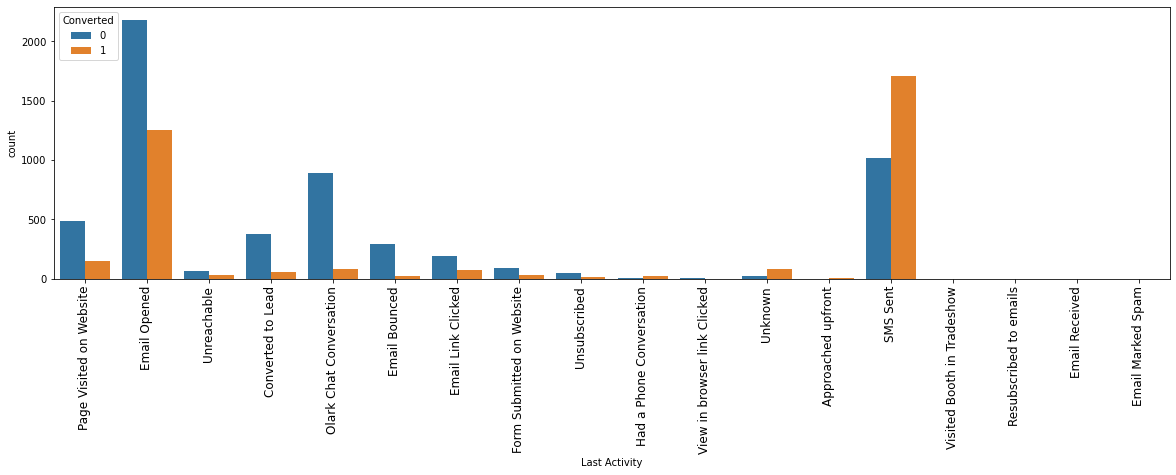

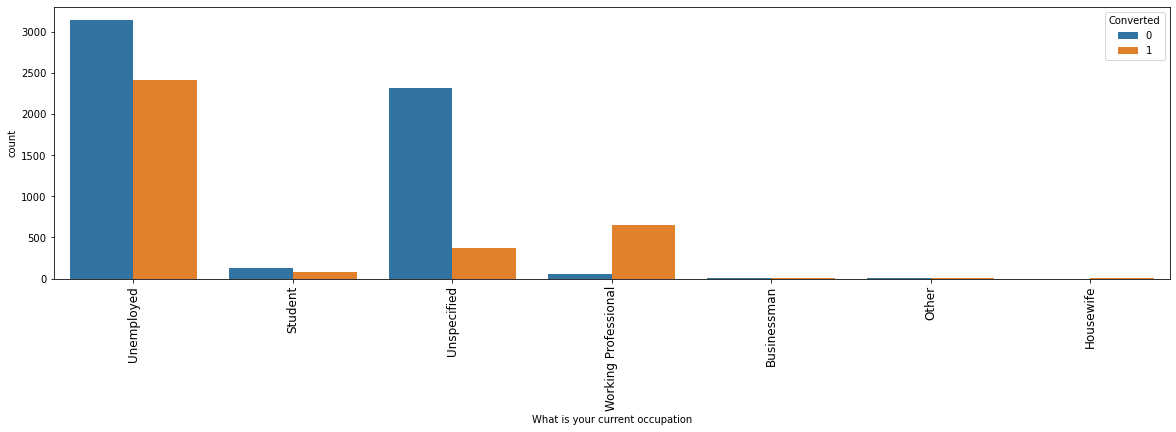

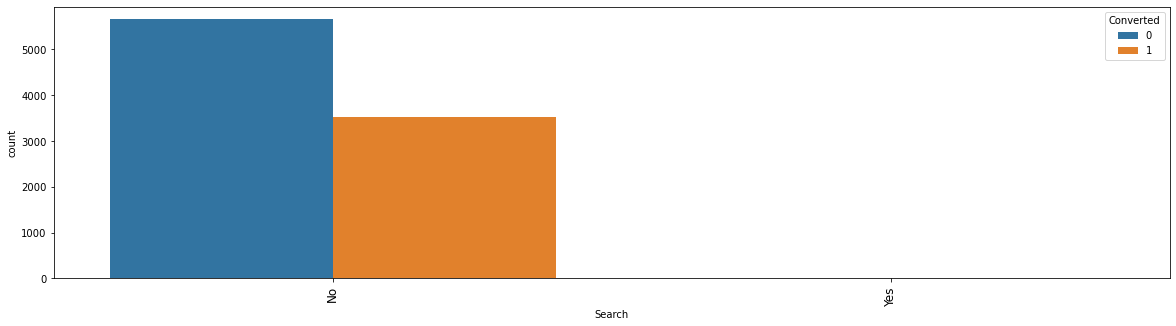

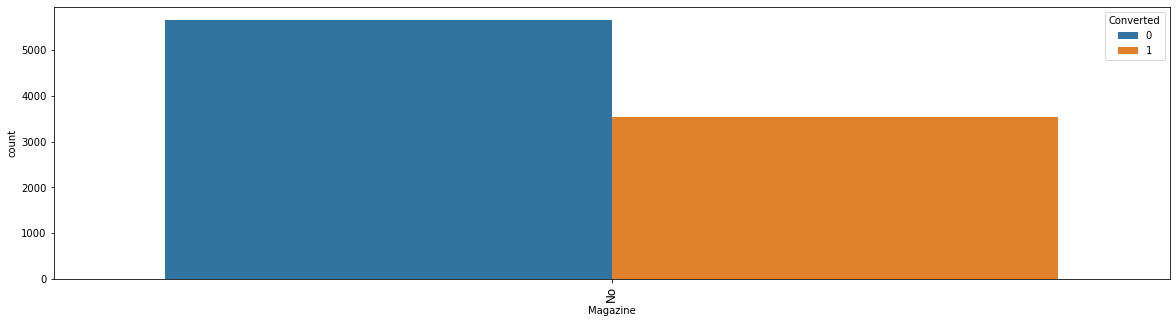

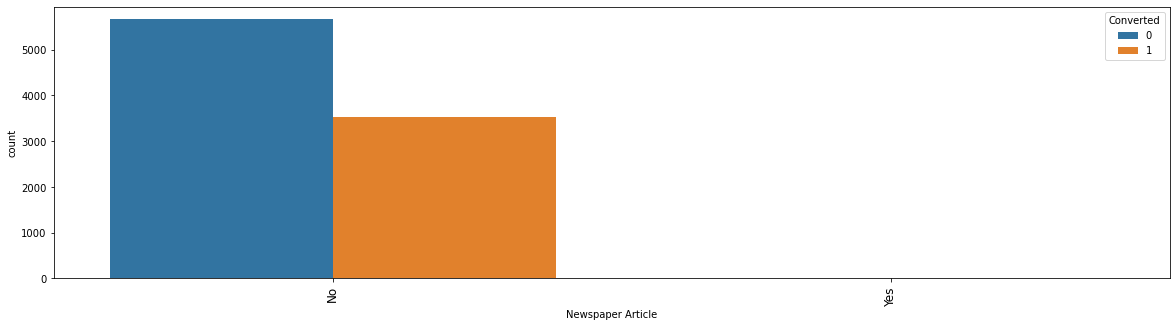

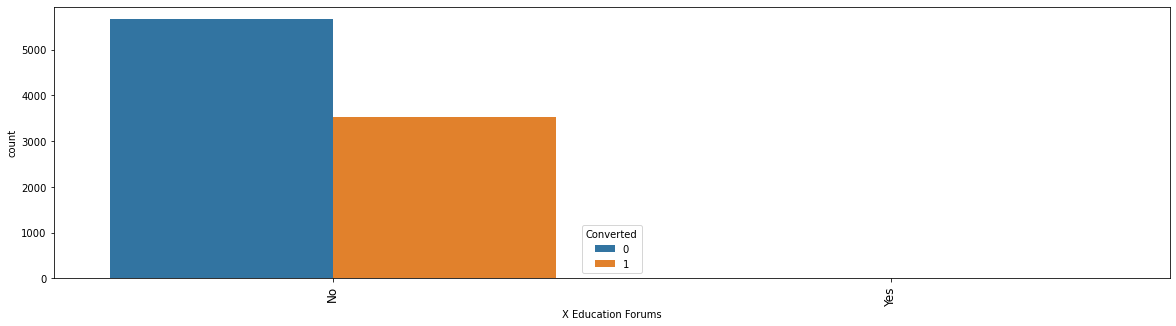

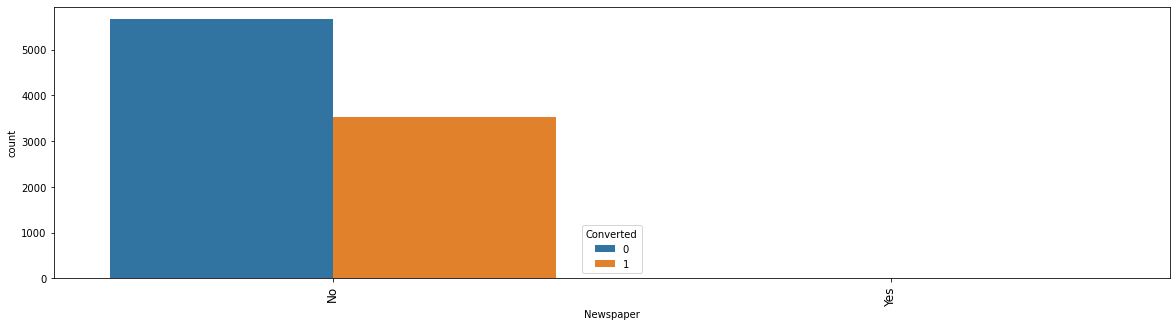

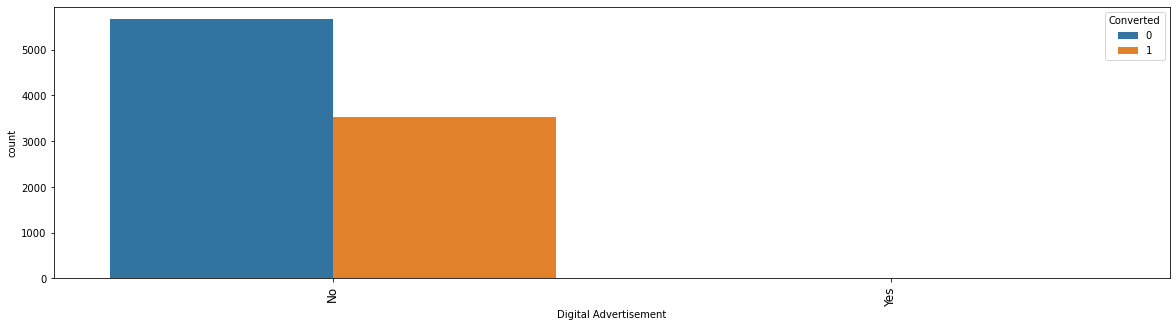

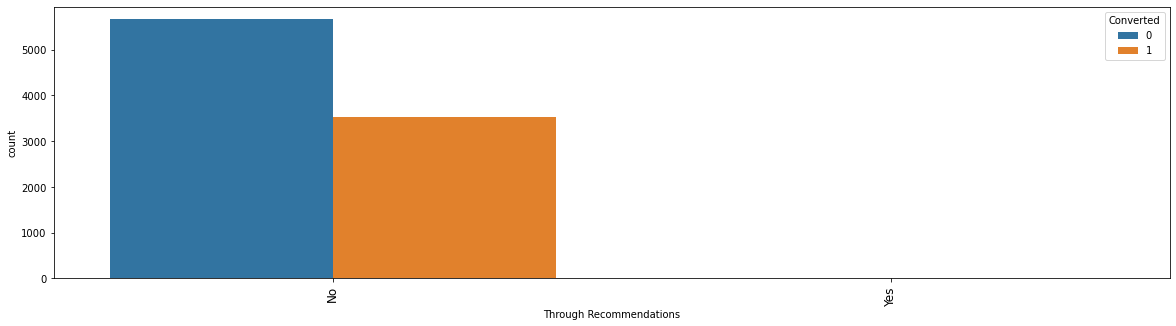

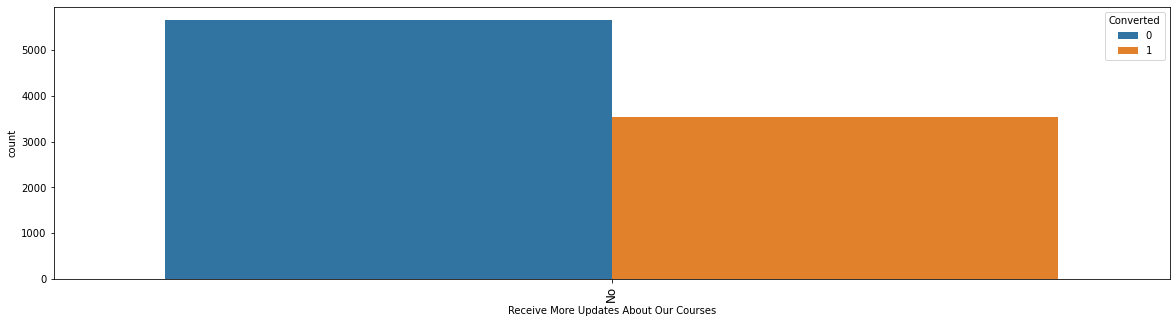

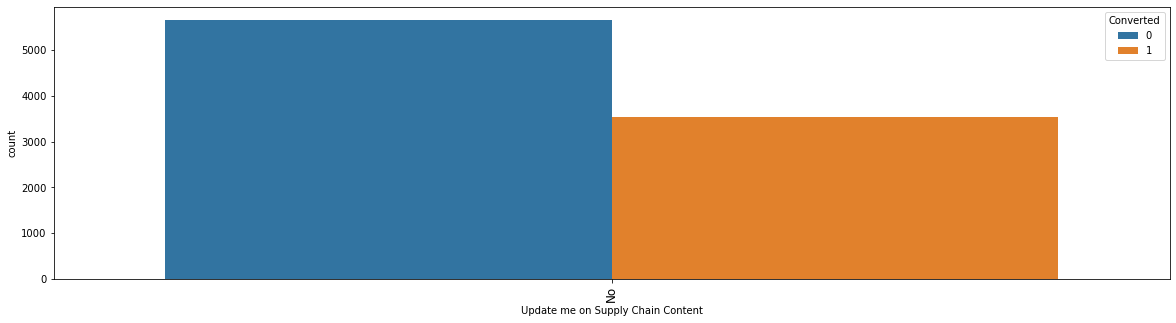

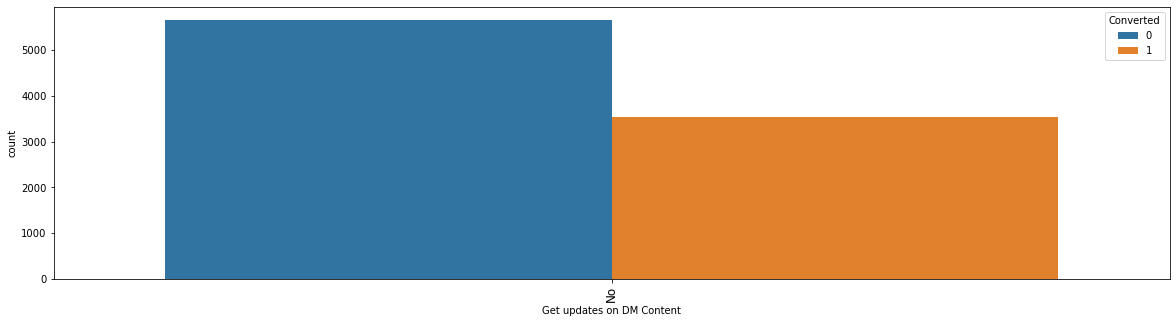

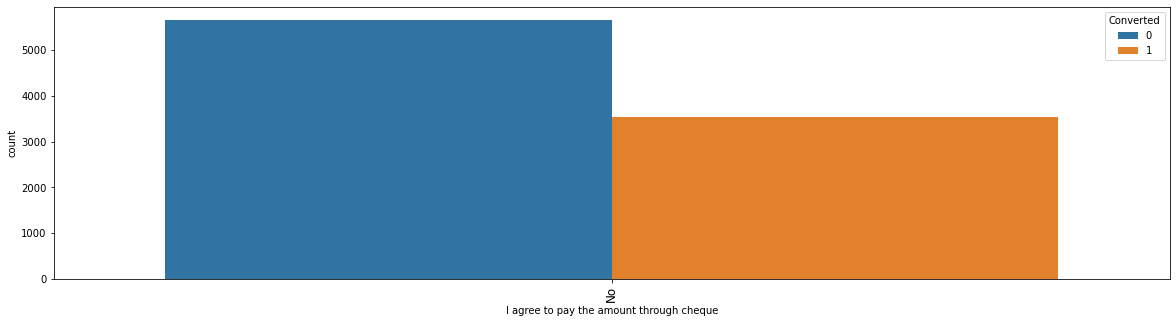

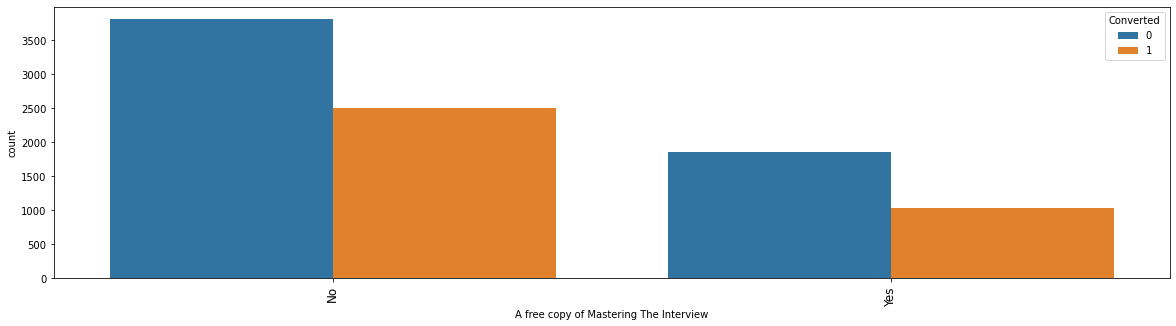

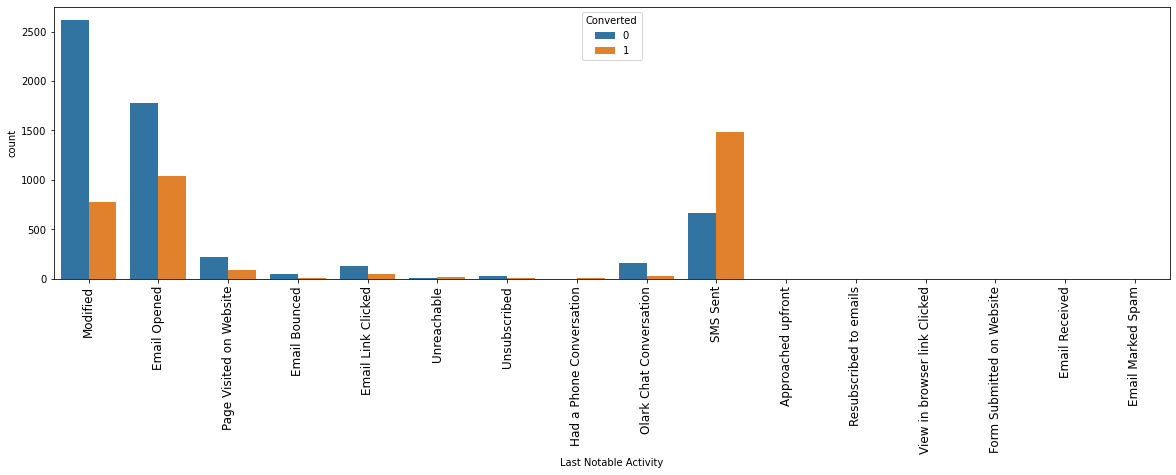

In [51]:
for col in cat_cols:
    plt.figure(figsize=(20,5))
    sns.countplot(data=data, x=col,hue='Converted')
    plt.xticks(size=12,rotation=90)
    plt.show()

**Insights:**
- `Lead Origin` *Lead Add Form* seems to provide more converted leads.
- `Google` seems to be the most popular `Lead Source`. However, *Reference* has more leads converted than not.
- Most of the leads have `Last Activity` as *Email Opened*. However, leads with `Last Activity` as *SMS Sent* have converted more often than not.
- *Unemployed* leads have been the most and have near same amount of converted and not converted leads. However *Working Professionals* have more leads converted than not.
- Similar to the `Last Activity`, *SMS Sent* has more leads converted than not.

Now as we can see that there are certain columns which are highly imbalanced and dont contribute for our purpose. Hence,we will drop these columns along with the identifier column `Lead Number`. We will keep the column `Prospect ID` for now and drop later after the train-test split.

In [52]:
drop_cols=['Lead Number','Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [53]:
data.drop(drop_cols,axis=1,inplace=True)
data.shape

(9192, 11)

Column `Lead Source` has a two categories with names 'Google' and 'google', which are practically the same thing. So, it is needed that both categories to be combined to a common name. Let's go with Google for our convenience.

In [54]:
data['Lead Source']=data['Lead Source'].replace('google','Google')

# 4. Data Preprocessing

## Dummy Variable Creation

Now let's create the dummy variables for all the categorical variables.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9192 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9192 non-null   object 
 1   Lead Origin                             9192 non-null   object 
 2   Lead Source                             9192 non-null   object 
 3   Converted                               9192 non-null   int64  
 4   TotalVisits                             9192 non-null   float64
 5   Total Time Spent on Website             9192 non-null   int64  
 6   Page Views Per Visit                    9192 non-null   float64
 7   Last Activity                           9192 non-null   object 
 8   What is your current occupation         9192 non-null   object 
 9   A free copy of Mastering The Interview  9192 non-null   object 
 10  Last Notable Activity                   9192 non-null   obje

Now, let's encode the categorical variables to dummy variables.

In [56]:
cat_to_dum=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
           'A free copy of Mastering The Interview','Last Notable Activity']

Now, as observed in EDA, there is a high imbalance in these columns. So, rather than using drop_first during dummy variable creation, we will manually drop the column which is either very less in number or is not that significant.

Let's jandle them  one by one.

Handling `Lead Origin`

In [57]:
data['Lead Origin'].value_counts()

Landing Page Submission    4875
API                        3578
Lead Add Form               685
Lead Import                  54
Name: Lead Origin, dtype: int64

We will drop Lead Import column after dummy variable creation as it is very less in number and has not significance related to the target variable, as observed in EDA.

In [58]:
dum_df=pd.get_dummies(data['Lead Origin'],prefix='Lead Origin')
dum_df.drop('Lead Origin_Lead Import',axis=1,inplace=True)
dum_df

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9235,0,1,0
9236,0,1,0
9237,0,1,0
9238,0,1,0


Handling `Lead Source`

In [59]:
data['Lead Source'].value_counts()

Google               2872
Direct Traffic       2535
Olark Chat           1755
Organic Search       1153
Reference             534
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

We will drop NC_EDM column after dummy variable creation as it is very less in number and has not significance related to the target variable, as observed in EDA.

In [60]:
temp_df=pd.get_dummies(data['Lead Source'],prefix='Lead Source')
temp_df.drop('Lead Source_NC_EDM',axis=1,inplace=True)
dum_df=pd.concat([dum_df,temp_df],axis=1)
dum_df

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9237,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9238,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Handling `Last Activity`

In [61]:
data['Last Activity'].value_counts()

Email Opened                    3430
SMS Sent                        2721
Olark Chat Conversation          973
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

We will drop Resubscribed to emails column after dummy variable creation as it is very less in number and has not significance related to the target variable, as observed in EDA.

In [62]:
temp_df=pd.get_dummies(data['Last Activity'],prefix='Last Activity')
temp_df.drop('Last Activity_Resubscribed to emails',axis=1,inplace=True)
dum_df=pd.concat([dum_df,temp_df],axis=1)
dum_df

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9237,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9238,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Handling `What is your current occupation`

In [63]:
data['What is your current occupation'].value_counts()

Unemployed              5559
Unspecified             2686
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We will drop Businessman column after dummy variable creation as it is very less in number and has not significance related to the target variable, as observed in EDA.

In [64]:
temp_df=pd.get_dummies(data['What is your current occupation'],prefix='What is your current occupation')
temp_df.drop('What is your current occupation_Businessman',axis=1,inplace=True)
dum_df=pd.concat([dum_df,temp_df],axis=1)
dum_df

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9237,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9238,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Handling `A free copy of Mastering The Interview`

In [65]:
data['A free copy of Mastering The Interview'].value_counts()

No     6308
Yes    2884
Name: A free copy of Mastering The Interview, dtype: int64

Here we can drop any as there are only two categories. However, for the convenience, we will keep the 'Yes' column.

In [66]:
temp_df=data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
dum_df=pd.concat([dum_df,temp_df],axis=1)
dum_df

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,A free copy of Mastering The Interview
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9236,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9237,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9238,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Last Notable Activity

Handling `Last Notable Activity`

In [67]:
data['Last Notable Activity'].value_counts()

Modified                        3393
Email Opened                    2821
SMS Sent                        2151
Page Visited on Website          313
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

We will drop Email Received column after dummy variable creation as it is very less in number and has not significance related to the target variable, as observed in EDA.

In [68]:
temp_df=pd.get_dummies(data['Last Notable Activity'],prefix='Last Notable Activity')
temp_df.drop('Last Notable Activity_Email Received',axis=1,inplace=True)
dum_df=pd.concat([dum_df,temp_df],axis=1)
dum_df

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now, combine the dummy variables to the main dataset and dorp the original columns.

In [69]:
data.drop(cat_to_dum,axis=1,inplace=True)

In [70]:
data=pd.concat([data,dum_df],axis=1)
data.shape

(9192, 66)

## Train Test Splitting

Let's first split the features and target variables.

In [71]:
y=data.pop('Converted')

In [72]:
X=data.copy()

Now, the next step in data preparation is splitting the dataset into train and test sets.

We will keep 30% of data as test set for model evaluation.

We will use stratified sampling according to the target variable (by setting param stratify=y) because the distribution of teh target variable is not uniform.

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45,shuffle=True,stratify=y)

In [74]:
print('The shape of train data feature matrix is',X_train.shape)
print('The shape of train data label vector is',y_train.shape)
print('The shape of test data feature matrix is',X_test.shape)
print('The shape of test data label vector is',y_test.shape)

The shape of train data feature matrix is (6434, 65)
The shape of train data label vector is (6434,)
The shape of test data feature matrix is (2758, 65)
The shape of test data label vector is (2758,)


## Feature Scaling

We will use the Standard Scaler technique for scaling the numerical features. This will centralize all the feature values around 0. We will use StandardScaler utility from sklearn.preprocessing API.

In [75]:
scaler=StandardScaler()

In [76]:
# Considering only the numerical features.
print(num_cols)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [77]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1958,bfeb34e0-1c3c-45e9-a291-a00533f9696d,-1.001288,-0.888542,-1.158167,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
468,df7b3e45-52e7-44df-a3a5-c3b932b1c877,-0.400748,-0.578866,-0.665730,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
861,dd52a76e-45fa-4f2a-8b4f-5efc50b395db,-0.400748,-0.536969,-0.173293,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5011,34fb5ad9-4198-4a7f-8b60-3e636ffd151b,-0.100479,-0.759207,-0.419511,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
190,cfac8c8e-1867-43bb-8e1b-ea3bf0965a78,-1.001288,-0.888542,-1.158167,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
X_train[num_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.434000e+03,6.434000e+03,6.434000e+03
mean,8.503542e-17,1.351111e-16,-4.767777e-16
std,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.001288e+00,-8.885424e-01,-1.158167e+00
25%,-7.010181e-01,-8.630396e-01,-6.657301e-01
50%,-1.004788e-01,-4.395116e-01,-1.732929e-01
75%,5.000605e-01,8.274293e-01,3.191443e-01
max,7.706532e+00,3.215581e+00,6.720828e+00


# 5. Training the model

Before moving further, we will drop the identifier column `Prospect ID` and store it separately, so that it can be used during the interpretation.

In [79]:
train_prospect_id = X_train.pop('Prospect ID')

In [80]:
train_prospect_id

1958    bfeb34e0-1c3c-45e9-a291-a00533f9696d
468     df7b3e45-52e7-44df-a3a5-c3b932b1c877
861     dd52a76e-45fa-4f2a-8b4f-5efc50b395db
5011    34fb5ad9-4198-4a7f-8b60-3e636ffd151b
190     cfac8c8e-1867-43bb-8e1b-ea3bf0965a78
                        ...                 
5016    66458098-0ee7-46f0-8d26-de8441cde64b
3144    72f1e734-8037-4a38-9f2a-f038a2aea3c7
8553    f3334bbd-1e9e-48a1-91f7-7cacb18bb2f8
8943    112b1f51-3cad-4acc-9a4b-5f1c952129df
5437    579cb3ad-9918-4cfc-9561-4ef446c7b2b2
Name: Prospect ID, Length: 6434, dtype: object

## Feature Selection using RFE

Now, our dataset is ready to be used for modelling. But as there are  a high number of features, the cost of computation in the model building could be diffcult. Hence, we will reduce the dimensions by selecting the top 15 features which have high importance throuh the feature selection technique of RFE, and then manually reducing the number of features.

In [81]:
# Run LogisticRegression estimator for RFE
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [82]:
# Run RFE to select 15 features.
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_API', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Click2call', False, 18),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_WeLearn', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 29),
 ('Lead Source_blog', False, 33),
 ('Lead Source_testone', False, 48),
 ('Lead Source_welearnblog_Home', False, 49),
 ('Lead Source_youtubechannel', False, 38)

In [84]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Approached upfront', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unspecified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## Build model using statsmodel for manual feature selection

We will use the following two metrics for feature selection.
- p-value < 0.5
- VIF < 5

For feature selection, we use the following algorithm:
- If p-value > 0.5 and VIF > 5, drop the variable
- Else if p-value > 0.5, drop the variable
- Else if VIF > 5, drop the variable
- Else Keep the model

In [85]:
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

First model

In [86]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Add constant variable for statsmodel
X_train_sm = add_constant(X_train_rfe)

In [87]:
logreg = GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6434
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.0
Date:                Tue, 06 Sep 2022   Deviance:                       5281.9
Time:                        21:19:29   Pearson chi2:                 6.46e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9653      0.084    -11.463      0.000      -1.130      -0.800
Total Time Spent on Website                              1.1382      0.040     28.402      0.000       1.060       1.217
Lead Origin_Landing Page Submission                     -0.3568      0.089     -4.022      0.000      -0.531      -0.183
Lead Origin_Lead Add Form                                3.4112      0.221     15.413      0.000       2.977       3.845
Lead Source_Facebook                                    -0.2690      0.457     -0.588      0.556      -1.166       0.628
Lead Source_Olark Chat                                   1.2348      0.122     10.158      0.000       0.997       1.473
Lead Source_Welingak Website                             2.5848      1.032      2.504      0.012       0.562       4.608
Last Activity_Approached upfront                        23.1638   2.64e+04      0.001      0.999   -5.17e+04    5.18e+04
Last Activity_Email Bounced                             -1.6508      0.301     -5.475      0.000      -2.242      -1.060
Last Activity_Olark Chat Conversation                   -1.4711      0.169     -8.685      0.000      -1.803      -1.139
Last Activity_SMS Sent                                   1.2229      0.074     16.530      0.000       1.078       1.368
What is your current occupation_Housewife               23.9937   2.51e+04      0.001      0.999   -4.91e+04    4.92e+04
What is your current occupation_Unspecified             -1.2096      0.087    -13.838      0.000      -1.381      -1.038
What is your current occupation_Working Professional     2.4630      0.180     13.656      0.000       2.109       2.816
Last Notable Activity_Had a Phone Conversation           3.5823      1.142      3.138      0.002       1.344       5.820
Last Notable Activity_Unreachable                        1.7507      0.519      3.370      0.001       0.732       2.769
========================================================================================================================
"""

In [88]:
VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,1.70
1,Lead Origin_Landing Page Submission,1.56
2,Lead Origin_Lead Add Form,1.49
9,Last Activity_SMS Sent,1.46
11,What is your current occupation_Unspecified,1.44
8,Last Activity_Olark Chat Conversation,1.41
5,Lead Source_Welingak Website,1.29
0,Total Time Spent on Website,1.25
12,What is your current occupation_Working Profes...,1.19
7,Last Activity_Email Bounced,1.07


Here, the VIF values for all the variables are under the limit. However, the p-values of some are over the threshold limits. Hence, as per the algorithm, we wil drop the one with the highest p-value. Now as `Last Activity_Approached upfront` and `What is your current occupation_Housewife` both has the hoghest p-value, we will drop any one of them. So let's drop `What is your current occupation_Housewife`.

In [89]:
X_train_rfe.drop('What is your current occupation_Housewife',axis=1,inplace=True)

Second model

In [90]:
# Add constant variable for statsmodel
X_train_sm = add_constant(X_train_rfe)

# Running the linear model
logreg = GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()

# Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6434
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.6
Date:                Tue, 06 Sep 2022   Deviance:                       5293.2
Time:                        21:19:29   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9600      0.084    -11.415      0.000      -1.125      -0.795
Total Time Spent on Website                              1.1377      0.040     28.423      0.000       1.059       1.216
Lead Origin_Landing Page Submission                     -0.3527      0.089     -3.981      0.000      -0.526      -0.179
Lead Origin_Lead Add Form                                3.4170      0.221     15.455      0.000       2.984       3.850
Lead Source_Facebook                                    -0.2713      0.457     -0.593      0.553      -1.168       0.625
Lead Source_Olark Chat                                   1.2329      0.121     10.148      0.000       0.995       1.471
Lead Source_Welingak Website                             2.5760      1.032      2.496      0.013       0.553       4.599
Last Activity_Approached upfront                        22.1566    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Last Activity_Email Bounced                             -1.6570      0.301     -5.497      0.000      -2.248      -1.066
Last Activity_Olark Chat Conversation                   -1.4744      0.169     -8.705      0.000      -1.806      -1.142
Last Activity_SMS Sent                                   1.2162      0.074     16.456      0.000       1.071       1.361
What is your current occupation_Unspecified             -1.2133      0.087    -13.888      0.000      -1.385      -1.042
What is your current occupation_Working Professional     2.4569      0.180     13.626      0.000       2.104       2.810
Last Notable Activity_Had a Phone Conversation           3.5741      1.142      3.130      0.002       1.336       5.812
Last Notable Activity_Unreachable                        1.7445      0.519      3.358      0.001       0.726       2.763
========================================================================================================================
"""

In [91]:
VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,1.70
1,Lead Origin_Landing Page Submission,1.56
2,Lead Origin_Lead Add Form,1.49
9,Last Activity_SMS Sent,1.46
10,What is your current occupation_Unspecified,1.44
8,Last Activity_Olark Chat Conversation,1.41
5,Lead Source_Welingak Website,1.29
0,Total Time Spent on Website,1.25
11,What is your current occupation_Working Profes...,1.19
7,Last Activity_Email Bounced,1.07


Now, `Last Activity_Approached upfront` has the highest p-value. So we will drop this column.

In [92]:
X_train_rfe.drop('Last Activity_Approached upfront',axis=1,inplace=True)

Third model

In [93]:
# Add constant variable for statsmodel
X_train_sm = add_constant(X_train_rfe)

# Running the linear model
logreg = GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()

# Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6434
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.3
Date:                Tue, 06 Sep 2022   Deviance:                       5300.6
Time:                        21:19:30   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9575      0.084    -11.385      0.000      -1.122      -0.793
Total Time Spent on Website                              1.1397      0.040     28.480      0.000       1.061       1.218
Lead Origin_Landing Page Submission                     -0.3509      0.089     -3.960      0.000      -0.525      -0.177
Lead Origin_Lead Add Form                                3.4235      0.221     15.495      0.000       2.990       3.857
Lead Source_Facebook                                    -0.2707      0.457     -0.592      0.554      -1.167       0.626
Lead Source_Olark Chat                                   1.2450      0.121     10.256      0.000       1.007       1.483
Lead Source_Welingak Website                             2.5712      1.032      2.491      0.013       0.548       4.594
Last Activity_Email Bounced                             -1.6627      0.302     -5.514      0.000      -2.254      -1.072
Last Activity_Olark Chat Conversation                   -1.4827      0.169     -8.756      0.000      -1.815      -1.151
Last Activity_SMS Sent                                   1.2115      0.074     16.397      0.000       1.067       1.356
What is your current occupation_Unspecified             -1.2181      0.087    -13.945      0.000      -1.389      -1.047
What is your current occupation_Working Professional     2.4534      0.180     13.606      0.000       2.100       2.807
Last Notable Activity_Had a Phone Conversation           3.5720      1.142      3.127      0.002       1.333       5.811
Last Notable Activity_Unreachable                        1.7415      0.520      3.351      0.001       0.723       2.760
========================================================================================================================
"""

In [94]:
VIF(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,1.69
1,Lead Origin_Landing Page Submission,1.56
2,Lead Origin_Lead Add Form,1.48
8,Last Activity_SMS Sent,1.46
9,What is your current occupation_Unspecified,1.44
7,Last Activity_Olark Chat Conversation,1.41
5,Lead Source_Welingak Website,1.29
0,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.19
6,Last Activity_Email Bounced,1.07


`Lead Source_Facebook`  has the highest p-value. So we will drop this column.

In [95]:
X_train_rfe.drop('Lead Source_Facebook',axis=1,inplace=True)

Fourth model

In [96]:
# Add constant variable for statsmodel
X_train_sm = add_constant(X_train_rfe)

# Running the linear model
logreg = GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()

# Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6434
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.5
Date:                Tue, 06 Sep 2022   Deviance:                       5300.9
Time:                        21:19:30   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9657      0.083    -11.634      0.000      -1.128      -0.803
Total Time Spent on Website                              1.1412      0.040     28.563      0.000       1.063       1.219
Lead Origin_Landing Page Submission                     -0.3436      0.088     -3.914      0.000      -0.516      -0.172
Lead Origin_Lead Add Form                                3.4328      0.220     15.574      0.000       3.001       3.865
Lead Source_Olark Chat                                   1.2539      0.121     10.404      0.000       1.018       1.490
Lead Source_Welingak Website                             2.5711      1.032      2.491      0.013       0.548       4.594
Last Activity_Email Bounced                             -1.6631      0.302     -5.515      0.000      -2.254      -1.072
Last Activity_Olark Chat Conversation                   -1.4807      0.169     -8.745      0.000      -1.813      -1.149
Last Activity_SMS Sent                                   1.2119      0.074     16.406      0.000       1.067       1.357
What is your current occupation_Unspecified             -1.2179      0.087    -13.941      0.000      -1.389      -1.047
What is your current occupation_Working Professional     2.4510      0.180     13.607      0.000       2.098       2.804
Last Notable Activity_Had a Phone Conversation           3.5738      1.142      3.129      0.002       1.335       5.812
Last Notable Activity_Unreachable                        1.7446      0.520      3.357      0.001       0.726       2.763
========================================================================================================================
"""

In [97]:
VIF(X_train_rfe)

,Features,VIF
3,Lead Source_Olark Chat,1.69
1,Lead Origin_Landing Page Submission,1.56
2,Lead Origin_Lead Add Form,1.48
7,Last Activity_SMS Sent,1.46
8,What is your current occupation_Unspecified,1.44
6,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Welingak Website,1.29
0,Total Time Spent on Website,1.25
9,What is your current occupation_Working Profes...,1.19
5,Last Activity_Email Bounced,1.07


Now all the remaining features have p-value and VIF lesser than the threshold values. So we can keep this as the final model.

## Predicted probalbilities

Let's find the predictions on the training set with this final model.

In [98]:
# Probabilities of predicting 1

y_train_pred_prob = res.predict(X_train_sm)
y_train_pred_prob[:5]

1958    0.099172
468     0.013062
861     0.170164
5011    0.276131
190     0.031543
dtype: float64

We will tabulate each predictions along with the client prospect id and the actual label.

In [99]:
train_summary_df = pd.DataFrame({'Prospect ID':train_prospect_id, 'Actual Label':y_train.values,'Converted prob':y_train_pred_prob})
train_summary_df

,Prospect ID,Actual Label,Converted prob
1958,bfeb34e0-1c3c-45e9-a291-a00533f9696d,0,0.099172
468,df7b3e45-52e7-44df-a3a5-c3b932b1c877,0,0.013062
861,dd52a76e-45fa-4f2a-8b4f-5efc50b395db,0,0.170164
5011,34fb5ad9-4198-4a7f-8b60-3e636ffd151b,0,0.276131
190,cfac8c8e-1867-43bb-8e1b-ea3bf0965a78,0,0.031543
...,...,...,...
5016,66458098-0ee7-46f0-8d26-de8441cde64b,1,0.324809
3144,72f1e734-8037-4a38-9f2a-f038a2aea3c7,0,0.046582
8553,f3334bbd-1e9e-48a1-91f7-7cacb18bb2f8,0,0.375193
8943,112b1f51-3cad-4acc-9a4b-5f1c952129df,1,0.811559


## Evaluation Metrics

Let's use **0.5** as the threshold and find the predictions.

In [100]:
train_summary_df['Predicted Label'] = train_summary_df['Converted prob'].map(lambda x: 1 if x>0.5 else 0)
train_summary_df.head()

,Prospect ID,Actual Label,Converted prob,Predicted Label
1958,bfeb34e0-1c3c-45e9-a291-a00533f9696d,0,0.099172,0
468,df7b3e45-52e7-44df-a3a5-c3b932b1c877,0,0.013062,0
861,dd52a76e-45fa-4f2a-8b4f-5efc50b395db,0,0.170164,0
5011,34fb5ad9-4198-4a7f-8b60-3e636ffd151b,0,0.276131,0
190,cfac8c8e-1867-43bb-8e1b-ea3bf0965a78,0,0.031543,0


Now, let's check different metrics to observe the model performance on the train set.

### Accuracy

In [101]:
print('The accuracy of model with 0.5 threshold on the training set is: {:.5f}'.format(accuracy_score(train_summary_df['Actual Label'],train_summary_df['Predicted Label'])))

The accuracy of model with 0.5 threshold on the training set is: 0.81131


### Confusion Matrix

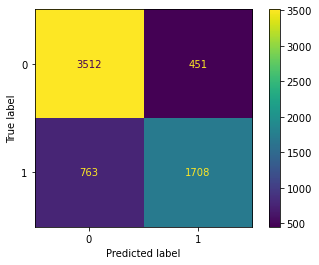

In [102]:
cm=confusion_matrix(train_summary_df['Actual Label'],train_summary_df['Predicted Label'])
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

### Sensitivity and Specificity

The equations for Sensitivity and Specificity are as below:

$$ Sensitivity = \frac{TP}{TP+FN} $$

$$ Specificity = \frac{TN}{TN+FP} $$
where, 
- ***TP***: True Positives
- ***FP***: False Positives
- ***TN***: True Negatives
- ***FN***: False Negatives

In [103]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [104]:
# Sensitivity
train_sensitivity = TP/(TP+FN)
print('The sensitivity of the model with 0.5 threshold on the training set is: {:.5f}'.format(train_sensitivity))

# Specificity
train_specificity = TN/(TN+FP)
print('The specificity of the model with 0.5 threshold on the training set is: {:.5f}'.format(train_specificity))

The sensitivity of the model with 0.5 threshold on the training set is: 0.69122
The specificity of the model with 0.5 threshold on the training set is: 0.88620


### ROC curve

It plots the graph between *False Positive Rate (1-Specificity)* and *True Positive Rate (Sensitivity)*.

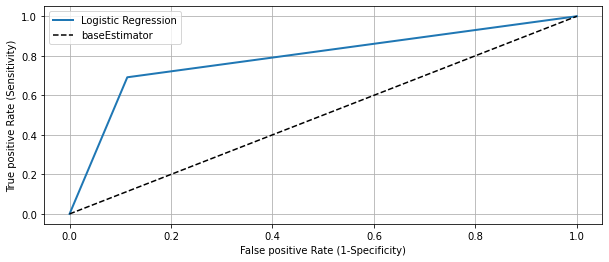

In [105]:
fpr,tpr,thresholds=roc_curve(train_summary_df['Actual Label'],train_summary_df['Predicted Label'],drop_intermediate=False)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,linewidth=2,label='Logistic Regression')
plt.plot([0,1],[0,1],'k--',label='baseEstimator')
plt.xlabel('False positive Rate (1-Specificity)')
plt.ylabel('True positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()
plt.show()

In [106]:
# the roc_score is
print('The roc_auc_score of the model is:',roc_auc_score(train_summary_df['Actual Label'],train_summary_df['Predicted Label']).round(3))

The roc_auc_score of the model is: 0.789


Since the roc_auc_score is between close to 0.8, so this seems a fairly good model.

## Best Threshold value selection for the model

So far, we have proceeded with the model having the cut-off thresold of 0.5. But the model performance can be improved by tuning the threshold value to the optimum value.

It is evident that Sensitivity and Specificity are moving in opposite directions with tthe increasing threshold values. It is also the similar pattern with two other important parameters precision and recall.

Hence, we will plot both curves and try to find the optimum value of threshold.

In [107]:
# Creating columns with different probability cutoffs 
numbers = np.arange(0,11)/10
for i in numbers:
    train_summary_df[i] = train_summary_df['Converted prob'].map(lambda x: 1 if x > i else 0)
train_summary_df.head()

,Prospect ID,Actual Label,Converted prob,Predicted Label,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1958,bfeb34e0-1c3c-45e9-a291-a00533f9696d,0,0.099172,0,1,0,0,0,0,0,0,0,0,0,0
468,df7b3e45-52e7-44df-a3a5-c3b932b1c877,0,0.013062,0,1,0,0,0,0,0,0,0,0,0,0
861,dd52a76e-45fa-4f2a-8b4f-5efc50b395db,0,0.170164,0,1,1,0,0,0,0,0,0,0,0,0
5011,34fb5ad9-4198-4a7f-8b60-3e636ffd151b,0,0.276131,0,1,1,1,0,0,0,0,0,0,0,0
190,cfac8c8e-1867-43bb-8e1b-ea3bf0965a78,0,0.031543,0,1,0,0,0,0,0,0,0,0,0,0


In [108]:
# Dataframe storing accuracy, sensitivity, and specificity at different threshold values
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])

numbers = np.arange(0,11)/10
for i in numbers:
    cm = confusion_matrix(train_summary_df['Actual Label'],train_summary_df[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,threshold,accuracy,sensitivity,specificity
0.0,0.0,0.384053,1.000000,0.000000
0.1,0.1,0.606932,0.976123,0.376735
0.2,0.2,0.757383,0.915419,0.658844
0.3,0.3,0.784893,0.872521,0.730255
0.4,0.4,0.812558,0.759611,0.845572
0.5,0.5,0.811315,0.691218,0.886197
0.6,0.6,0.803388,0.625658,0.914206
0.7,0.7,0.781784,0.516390,0.947262
0.8,0.8,0.760336,0.426143,0.968711
0.9,0.9,0.714330,0.275597,0.987888


We will plot accuracy, sensitivity and specificity and find the optimum threshold value.

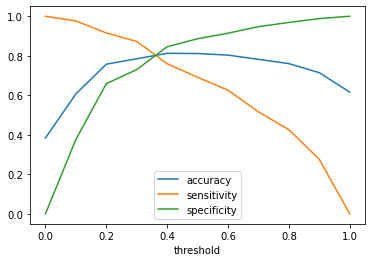

In [109]:
cutoff_df.plot.line(x='threshold', y=['accuracy','sensitivity','specificity'])
plt.show()

Here, the optimum value of the cut-off threshold seems to be between 0.3 and 0.4. However, the business requirement is that minimum Lead Conversion Rate should be 80%, This can be interpreted as of all actual leads, 80% should be predicted correctly. So ***Sensitivity/Recall*** should be at least 0.8. So we need to consider this criteria also. Therefore let's take 0.33 as the optimum threshold value.

However, this cutoff can be varied back and forth from this point, as per the company's different requirements.

We will also look at the Precision-Recall Curve to  look at the optimum cut-off threshold value.

In [110]:
precisions, recalls, thresholds = precision_recall_curve(train_summary_df['Actual Label'],train_summary_df['Converted prob'])

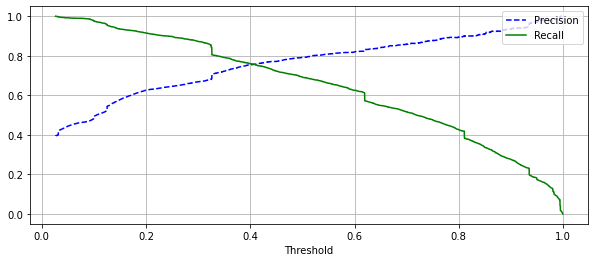

In [111]:
plt.figure(figsize=(10,4))
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [112]:
np.where(precisions==recalls)

(array([2024], dtype=int64),)

In [113]:
thresholds[2024]

0.4067319324875394

This gives 0.41 as the threshold value. However, for this value, the Recall is below 0.8, which is below the company's expectation. Hence, we will consider the value we for from the first curve, which is 0.33.

## Final Predictions and Evaluation on Training sets using Optimal threshold value

### Final predictions

Now, let's find the final predicted value with the optimum threshold value of **0.33**.

In [114]:
train_summary_df.head()

,Prospect ID,Actual Label,Converted prob,Predicted Label,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1958,bfeb34e0-1c3c-45e9-a291-a00533f9696d,0,0.099172,0,1,0,0,0,0,0,0,0,0,0,0
468,df7b3e45-52e7-44df-a3a5-c3b932b1c877,0,0.013062,0,1,0,0,0,0,0,0,0,0,0,0
861,dd52a76e-45fa-4f2a-8b4f-5efc50b395db,0,0.170164,0,1,1,0,0,0,0,0,0,0,0,0
5011,34fb5ad9-4198-4a7f-8b60-3e636ffd151b,0,0.276131,0,1,1,1,0,0,0,0,0,0,0,0
190,cfac8c8e-1867-43bb-8e1b-ea3bf0965a78,0,0.031543,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
numbers

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [116]:
train_final_summary = train_summary_df.drop(numbers,axis=1)  # dropping all threshold columns, which will not be needed further
train_final_summary.drop('Predicted Label',axis=1,inplace=True) # dropping the old predicted column for 0.5 threshold
train_final_summary['Predicted Label']=train_summary_df['Converted prob'].map(lambda x:1 if x>0.33 else 0)
train_final_summary.head()

,Prospect ID,Actual Label,Converted prob,Predicted Label
1958,bfeb34e0-1c3c-45e9-a291-a00533f9696d,0,0.099172,0
468,df7b3e45-52e7-44df-a3a5-c3b932b1c877,0,0.013062,0
861,dd52a76e-45fa-4f2a-8b4f-5efc50b395db,0,0.170164,0
5011,34fb5ad9-4198-4a7f-8b60-3e636ffd151b,0,0.276131,0
190,cfac8c8e-1867-43bb-8e1b-ea3bf0965a78,0,0.031543,0


### Evaluation metrics on training sets

### Accuracy

In [117]:
print('The accuracy of model with 0.35 threshold on the training set is:{:.5f}'.format(accuracy_score(train_final_summary['Actual Label'],train_final_summary['Predicted Label'])))

The accuracy of model with 0.35 threshold on the training set is:0.79810


### Confusion Matrix

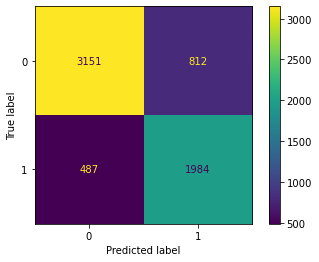

In [118]:
cm_35=confusion_matrix(train_final_summary['Actual Label'],train_final_summary['Predicted Label'])
cm_display=ConfusionMatrixDisplay(cm_35).plot()
plt.show()

### Sensitivity and Specificity

The equations for Sensitivity and Specificity are as below:

$$ Sensitivity = \frac{TP}{TP+FN} $$

$$ Specificity = \frac{TN}{TN+FP} $$
where, 
- ***TP***: True Positives
- ***FP***: False Positives
- ***TN***: True Negatives
- ***FN***: False Negatives

In [119]:
TP = cm_35[1,1] # true positive 
TN = cm_35[0,0] # true negatives
FP = cm_35[0,1] # false positives
FN = cm_35[1,0] # false negatives

In [120]:
# Sensitivity
train_sensitivity = TP/(TP+FN)
print('The sensitivity of the model with 0.35 threshold on the training set is: {:.5f}'.format(train_sensitivity))

# Specificity
train_specificity = TN/(TN+FP)
print('The specificity of the model with 0.35 threshold on the training set is : {:.5f}'.format(train_specificity))

The sensitivity of the model with 0.35 threshold on the training set is: 0.80291
The specificity of the model with 0.35 threshold on the training set is : 0.79510


Here is the summary with the optimum threshold values of 0.35.

Threshold=0.33:
- **Accuracy:** 79.81%
- **Sensitivity:** 80.29%
- **Specificity:** 79.51%

### Precision, Recall and F1-score

In [121]:
print('The classification report of the model')
print(classification_report(train_final_summary['Actual Label'],train_final_summary['Predicted Label']))

The classification report of the model
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3963
           1       0.71      0.80      0.75      2471

    accuracy                           0.80      6434
   macro avg       0.79      0.80      0.79      6434
weighted avg       0.81      0.80      0.80      6434



For Threshold=0.33 for predicting the Converted leads as '1',
- **Precision:** 0.71
- **Recall:** 0.80
- **F1-score:** 0.75

# 6. Evaluating the model on Test set

## Preprocessing of Test set

We need to preprocess the test set same as the train set to obtain the predictions.

In [122]:
X_test.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
719,f2dc2569-9a9b-4461-b2d2-b745221eab7c,2.0,122,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
840,a7b064a7-1901-4ca4-8bac-5c5ab0a6bf15,13.0,1097,6.5,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5789,57ba13c7-e411-4ef7-83c9-1e52aabf5d10,4.0,750,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2775,86f8d1b8-a01d-47cc-9426-9bd202f369b4,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6892,7a8aa126-143d-4042-8bba-ff8a19b73432,3.0,1129,3.0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [123]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
719,f2dc2569-9a9b-4461-b2d2-b745221eab7c,-0.400748,-0.666304,-0.173293,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
840,a7b064a7-1901-4ca4-8bac-5c5ab0a6bf15,2.902218,1.109781,2.042674,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5789,57ba13c7-e411-4ef7-83c9-1e52aabf5d10,0.199791,0.477677,0.811581,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2775,86f8d1b8-a01d-47cc-9426-9bd202f369b4,-1.001288,-0.888542,-1.158167,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6892,7a8aa126-143d-4042-8bba-ff8a19b73432,-0.100479,1.168073,0.319144,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [124]:
X_test[num_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2758.000000,2758.000000,2758.000000
mean,0.021349,0.006784,0.002701
std,1.047199,0.993988,1.043838
min,-1.001288,-0.888542,-1.158167
25%,-0.701018,-0.866683,-0.665730
50%,-0.100479,-0.412187,-0.173293
75%,0.500061,0.805570,0.319144
max,7.105993,3.250192,6.720828


In [125]:
X_test_rfe=X_test[X_train_rfe.columns]
X_test_rfe.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
719,-0.666304,1,0,0,0,0,0,0,0,0,0,0
840,1.109781,0,0,0,0,0,1,0,0,0,0,0
5789,0.477677,1,0,0,0,0,0,0,1,0,0,0
2775,-0.888542,0,0,1,0,0,0,0,0,0,0,0
6892,1.168073,1,0,0,0,0,0,1,0,1,0,0


In [126]:
X_test_rfe.shape

(2758, 12)

In [127]:
X_test_sm = add_constant(X_test_rfe)
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
719,1.0,-0.666304,1,0,0,0,0,0,0,0,0,0,0
840,1.0,1.109781,0,0,0,0,0,1,0,0,0,0,0
5789,1.0,0.477677,1,0,0,0,0,0,0,1,0,0,0
2775,1.0,-0.888542,0,0,1,0,0,0,0,0,0,0,0
6892,1.0,1.168073,1,0,0,0,0,0,1,0,1,0,0


## Predictions on Test set

In [128]:
# Finding the predicted probabilities from the model on the test set
y_test_pred_prob=res.predict(X_test_sm)

# Creating a dataframe for storing the predicted probabilities and labels along with the actual labels and prospect ids.
test_final_summary = pd.DataFrame({'Prospect ID':X_test['Prospect ID'], 'Actual Label':y_test.values,'Converted prob':y_test_pred_prob})
test_final_summary.head()

# Final predictions with the optimum threshold of 0.35
test_final_summary['Predicted Label']=test_final_summary['Converted prob'].map(lambda x:1 if x>0.33 else 0)

test_final_summary.head()

,Prospect ID,Actual Label,Converted prob,Predicted Label
719,f2dc2569-9a9b-4461-b2d2-b745221eab7c,0,0.112082,0
840,a7b064a7-1901-4ca4-8bac-5c5ab0a6bf15,1,0.235068,0
5789,57ba13c7-e411-4ef7-83c9-1e52aabf5d10,0,0.121100,0
2775,86f8d1b8-a01d-47cc-9426-9bd202f369b4,0,0.326118,0
6892,7a8aa126-143d-4042-8bba-ff8a19b73432,1,0.975558,1


## Evaluations on Test set

### Accuracy

In [129]:
print('The accuracy of model with 0.35 threshold on the test set is:{:.5f}'.format(accuracy_score(test_final_summary['Actual Label'],test_final_summary['Predicted Label'])))

The accuracy of model with 0.35 threshold on the test set is:0.81581


### Confusion Matrix

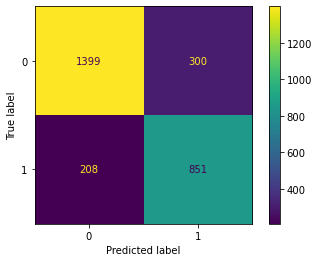

In [130]:
cm_35=confusion_matrix(test_final_summary['Actual Label'],test_final_summary['Predicted Label'])
cm_display=ConfusionMatrixDisplay(cm_35).plot()
plt.show()

### Sensitivity and Specificity

In [131]:
TP = cm_35[1,1] # true positive 
TN = cm_35[0,0] # true negatives
FP = cm_35[0,1] # false positives
FN = cm_35[1,0] # false negatives

In [132]:
# Sensitivity
train_sensitivity = TP/(TP+FN)
print('The sensitivity of the model with 0.35 threshold on the training set is: {:.5f}'.format(train_sensitivity))

# Specificity
train_specificity = TN/(TN+FP)
print('The specificity of the model with 0.35 threshold on the training set is : {:.5f}'.format(train_specificity))

The sensitivity of the model with 0.35 threshold on the training set is: 0.80359
The specificity of the model with 0.35 threshold on the training set is : 0.82343


Here is the summary on Test set.

Threshold=0.33:
- **Accuracy:** 81.58%
- **Sensitivity:** 80.36%
- **Specificity:** 82.34%

### Precision, Recall and F1-score

In [133]:
print('The classification report of the model')
print(classification_report(test_final_summary['Actual Label'],test_final_summary['Predicted Label']))

The classification report of the model
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1699
           1       0.74      0.80      0.77      1059

    accuracy                           0.82      2758
   macro avg       0.80      0.81      0.81      2758
weighted avg       0.82      0.82      0.82      2758



For Threshold=0.33 for predicting the Converted leads as '1',
- **Precision:** 0.74
- **Recall:** 0.80
- **F1-score:** 0.77

# 7. Assigning Lead Score

As we have the Probabilty for each lead to be converted from the model, which is in range (0,1), therefore, we will use it as the score to determine the likelyhood of conversion.

For Training set

In [134]:
train_final_summary['Lead Score'] = (train_final_summary['Converted prob']*100).round(2)
train_final_summary.sort_values('Lead Score',ascending=False)

,Prospect ID,Actual Label,Converted prob,Predicted Label,Lead Score
8293,cc3b9e58-dcdb-4e0c-b9c5-132e957c01cb,1,0.999465,1,99.95
7219,ed62264f-7666-4bf9-9cb6-5b9a825f1e67,1,0.999525,1,99.95
3478,59d2f9c6-d03e-4c51-8324-0c76feb19df6,1,0.999396,1,99.94
6383,17868ac7-71a8-49a7-8aa0-deea12139b71,1,0.999361,1,99.94
2656,59996c52-d485-48c6-9777-d8deaec1e4ab,1,0.999437,1,99.94
...,...,...,...,...,...
9112,ca29c747-2be1-415b-8904-0e3cd393b00e,0,0.005983,0,0.60
8793,212fdd5b-0dcd-4f56-9ec8-468aed2fe083,0,0.005971,0,0.60
6628,60f52b48-f04d-47f4-82c7-24d3bb0848eb,0,0.005885,0,0.59
6669,fef32ecc-a187-4141-9fd8-dbfb0a8dc55a,0,0.005741,0,0.57


For Test set

In [135]:
test_final_summary['Lead Score'] = (test_final_summary['Converted prob']*100).round(2)
test_final_summary.sort_values('Lead Score',ascending=False)

,Prospect ID,Actual Label,Converted prob,Predicted Label,Lead Score
6620,588ddab6-30c5-4153-a3de-28539113bb5d,1,0.999147,1,99.91
5921,bb3840bf-b040-45f3-a494-68927055dbb1,1,0.998869,1,99.89
177,3b74e995-4407-44de-9e59-622afb514261,1,0.998644,1,99.86
994,1627d1fe-f39b-4a29-ba9e-ab40ab643d05,1,0.998563,1,99.86
8081,2c9ee018-0f52-4596-aa29-f65210d917d1,1,0.998349,1,99.83
...,...,...,...,...,...
7513,ccf537d1-d20f-4499-bf23-9b6de4edcb89,0,0.007310,0,0.73
5897,4fd9474f-0ee7-44ed-adea-dc515e59e694,0,0.007058,0,0.71
3860,2d0709c7-2d77-4ee8-8c9d-28ba233f241f,0,0.007026,0,0.70
7916,8ca2510a-4533-4bec-b71c-bba8a319d1a3,0,0.006512,0,0.65


# 8. Interpretation of the model

## Equation of the log of Odds

Let's see the coefficents of each variables.

In [136]:
res.params.abs().sort_values(ascending=False)

Last Notable Activity_Had a Phone Conversation          3.573833
Lead Origin_Lead Add Form                               3.432818
Lead Source_Welingak Website                            2.571081
What is your current occupation_Working Professional    2.451032
Last Notable Activity_Unreachable                       1.744578
Last Activity_Email Bounced                             1.663085
Last Activity_Olark Chat Conversation                   1.480668
Lead Source_Olark Chat                                  1.253916
What is your current occupation_Unspecified             1.217900
Last Activity_SMS Sent                                  1.211936
Total Time Spent on Website                             1.141190
const                                                   0.965716
Lead Origin_Landing Page Submission                     0.343557
dtype: float64

In [137]:
res.params.sort_values(ascending=False)

Last Notable Activity_Had a Phone Conversation          3.573833
Lead Origin_Lead Add Form                               3.432818
Lead Source_Welingak Website                            2.571081
What is your current occupation_Working Professional    2.451032
Last Notable Activity_Unreachable                       1.744578
Lead Source_Olark Chat                                  1.253916
Last Activity_SMS Sent                                  1.211936
Total Time Spent on Website                             1.141190
Lead Origin_Landing Page Submission                    -0.343557
const                                                  -0.965716
What is your current occupation_Unspecified            -1.217900
Last Activity_Olark Chat Conversation                  -1.480668
Last Activity_Email Bounced                            -1.663085
dtype: float64

The equation of the best fitted line obtained from the model is:

$ ln(ODDs)= 3.574*Last Notable Activity\_Had\ a Phone\ Conversation+3.433*Lead\ Origin\_Lead Add Form+2.571*Lead\ Source\_Welingak\ Website+2.451*What\ is\ your\ current\ occupation\_Working\ Professional+1.745*Last Notable Activity\_Unreachable-1.663*Last Activity\_Email Bounced-1.481*Last Activity\_Olark\ Chat\ Conversation+1.254*Lead\ Source\_Olark\ Chat-1.218*What\ is\ your\ current\ occupation\_Unspecified+1.212*Last Activity\_SMS Sent+1.141*Total\ Time\ Spent\ on\ Website-0.344*Lead\ Origin\_Landing Page Submission-0.966$


## Interpretation

As per the model built using Logistic Regression (Normal Equation), we found that, from the most to the least, the likelihood of the actual lead classification depends on:
- If the Last Notable Activity of the lead is *Had a Phone Conversation*, then the likelihood of the lead converting increases.
- If the Last Origin of the lead is *Lead Add Form*, then the likelihood of the lead converting increases.
- If the Last Source of the lead is *Welingak Website*, then the likelihood of the lead converting increases.
- If the Current Occupation of the lead is *Working Professional*, then the likelihood of the lead converting increases.
- If the Last Notable Activity of the lead is *Unreachable*, then the likelihood of the lead converting increases.
- If the Last Activity of the lead is *Email Bounced*, then the likelihood of the lead converting decreases.
- If the Last Activity of the lead is *Olark Chat Conversation*, then the likelihood of the lead converting decreases.
- If the Last Source of the lead is *Olark Chat*, then the likelihood of the lead converting increases.
- If the Current Occupation of the lead is *Unspecified*, then the likelihood of the lead converting decreases.
- If the Last Activity of the lead is *SMS Sent*, then the likelihood of the lead converting increases.
- If the Total Time Spent on Website increases, then the likelihood of the lead converting increases.
- If the Last Origin of the lead is *Landing Page Submission*, then the likelihood of the lead converting decreases.

# 9. Conclusion

## Model Summary

For Test Set:
- **Accuracy:** 81.58%
- **Sensitivity:** 80.36%
- **Specificity:** 82.34%
- **Precision:** 0.74
- **Recall:** 0.80
- **F1-score:** 0.77

***Conversion Rate for the leads is more than 80%***

## Recommendations

- Leads who had phone call conversation have to be marketed more by making more calls.
- Leads who were identified after filling up the form are to be targetted more.
- Leads from Wellingak Website are potentially hot lead contenders.
- Working Professionals are potentially hot lead contenders.
- Avoid leads who had their email bounced recently and had not done any activity further.

## Further Scope 

Though the model has about 80 % accuracy in identifying the converted leads; however the following approaches can be done for improving the model.
- Using derived variables as features.
- Using SGDCLassifier with Hyperparameter tuning.
- Using cross-validation in training set while modelling.
- Using Polynomial Transformation on the features.
- Using Other classification methods.